In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist


In [ ]:
#import dataset
BASE_URL = BASE_URL = "https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv"
RANDOM_SEED = 1



In [ ]:
df = pd.read_csv(BASE_URL)
df = df.round(2)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,0.00,0,2,1000.0,201.80,139.51,0.00,12
1,C10002,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,0.25,4,0,7000.0,4103.03,1072.34,0.22,12
2,C10003,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,0.00,0,12,7500.0,622.07,627.28,0.00,12
3,C10004,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,0.08,1,1,7500.0,0.00,NaN,0.00,12
4,C10005,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,0.00,0,1,1200.0,678.33,244.79,0.00,12


In [ ]:
#alcuni valori di MINIMUM_PAYMENTS sono maggiori di PAYMENTS, essendo improbabile sostituisco il primo copiando il secondo
df['MINIMUM_PAYMENTS'] = np.where(df['MINIMUM_PAYMENTS'] > df['PAYMENTS'], df['PAYMENTS'], df['MINIMUM_PAYMENTS'])

In [ ]:
#Analisi Esplorativa dei Dati (EDA)
df.shape


(8950, 18)

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474826,0.877426,1003.204834,592.437371,411.067645,978.871102,0.490217,0.202177,0.364553,0.134911,3.248827,14.709832,4494.449450,1733.143878,569.399458,0.153534,11.517318
std,2081.531851,0.237169,2136.634782,1659.887917,904.338115,2097.163869,0.401678,0.298555,0.397623,0.200262,6.824647,24.857649,3638.815726,2895.063787,846.257042,0.292648,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.020000,0.000000,6.000000
25%,128.280000,0.890000,39.635000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.272500,163.370000,0.000000,12.000000
50%,873.385000,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.080000,0.170000,0.000000,0.000000,7.000000,3000.000000,856.900000,276.650000,0.000000,12.000000
75%,2054.137500,1.000000,1110.130000,577.405000,468.637500,1113.822500,0.920000,0.300000,0.750000,0.220000,4.000000,17.000000,6500.000000,1901.135000,671.320000,0.140000,12.000000
max,19043.140000,1.000000,49039.570000,40761.250000,22500.000000,47137.210000,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.480000,20418.330000,1.000000,12.000000


In [ ]:
#Individuo i dati mancanti
df.count()

,0
CUST_ID,8950
BALANCE,8950
BALANCE_FREQUENCY,8950
PURCHASES,8950
ONEOFF_PURCHASES,8950
INSTALLMENTS_PURCHASES,8950
CASH_ADVANCE,8950
PURCHASES_FREQUENCY,8950
ONEOFF_PURCHASES_FREQUENCY,8950
PURCHASES_INSTALLMENTS_FREQUENCY,8950


In [ ]:
#valuto se eliminare le colonne che hanno il almeno il 30% di dati mancanti
df.count()<df.shape[0]*0.7
#dal risulato si evince che nessuna colonna ha dati mancanti in quella percentuale

,0
CUST_ID,False
BALANCE,False
BALANCE_FREQUENCY,False
PURCHASES,False
ONEOFF_PURCHASES,False
INSTALLMENTS_PURCHASES,False
CASH_ADVANCE,False
PURCHASES_FREQUENCY,False
ONEOFF_PURCHASES_FREQUENCY,False
PURCHASES_INSTALLMENTS_FREQUENCY,False


In [ ]:
#sostituisto i valori mancanti delle colonne "CREDIT_LIMIT" CL e "MINIMUM_PAYMENTS" MP con il valore medio

columns_to_fill = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']
df[columns_to_fill] = df[columns_to_fill].apply(lambda col: col.fillna(col.mean()))


In [ ]:
df.count()

,0
CUST_ID,8950
BALANCE,8950
BALANCE_FREQUENCY,8950
PURCHASES,8950
ONEOFF_PURCHASES,8950
INSTALLMENTS_PURCHASES,8950
CASH_ADVANCE,8950
PURCHASES_FREQUENCY,8950
ONEOFF_PURCHASES_FREQUENCY,8950
PURCHASES_INSTALLMENTS_FREQUENCY,8950


In [ ]:
#Normalizzazione e delle variabili quantitative, come BALANCE, PURCHASES e CASH_ADVANCE con Scikit-learn


mms = MinMaxScaler()
X = df[["BALANCE", "PURCHASES" , "CASH_ADVANCE"]].values
X_norm = mms.fit_transform(X)
print(X_norm.min(), X_norm.max())
print(X_norm[:5])



0.0 1.0
[[0.00214776 0.00194537 0.        ]
 [0.16816922 0.         0.13668501]
 [0.13102619 0.01576625 0.        ]
 [0.08752076 0.03056715 0.00436577]
 [0.04293987 0.00032627 0.        ]]


In [ ]:
#Standardizzazione delle variabili quantitative, come BALANCE, PURCHASES e CASH_ADVANCE con Scikit-learn

ss = StandardScaler()
X = df[["BALANCE", "PURCHASES" , "CASH_ADVANCE"]].values
X_std = ss.fit_transform(X)
X_std[:5]

array([[-0.73198974, -0.42489974, -0.46678555],
       [ 0.78696211, -0.46955188,  2.60560668],
       [ 0.44713569, -0.10766823, -0.46678555],
       [ 0.04909888,  0.23205785, -0.3686523 ],
       [-0.35877738, -0.46206305, -0.46678555]])

In [ ]:
#Normalizzazione delle variabili quantitative, come BALANCE, PURCHASES e CASH_ADVANCE con Pandas
df_norm = df.copy()

features = ["BALANCE", "PURCHASES" , "CASH_ADVANCE"] # colonne del dataframe da normalizzare
to_norm = df_norm[features]
df_norm[features] = (to_norm-to_norm.min())/(to_norm.max()-to_norm.min())
#eseguo l'algoritmo sulle colonne interessate
df_norm.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,0.002148,0.82,0.001945,0.00,95.4,0.000000,0.17,0.00,0.08,0.00,0,2,1000.0,201.80,139.510000,0.00,12
1,C10002,0.168169,0.91,0.000000,0.00,0.0,0.136685,0.00,0.00,0.00,0.25,4,0,7000.0,4103.03,1072.340000,0.22,12
2,C10003,0.131026,1.00,0.015766,773.17,0.0,0.000000,1.00,1.00,0.00,0.00,0,12,7500.0,622.07,622.070000,0.00,12
3,C10004,0.087521,0.64,0.030567,1499.00,0.0,0.004366,0.08,0.08,0.00,0.08,1,1,7500.0,0.00,569.399458,0.00,12
4,C10005,0.042940,1.00,0.000326,16.00,0.0,0.000000,0.08,0.08,0.00,0.00,0,1,1200.0,678.33,244.790000,0.00,12


In [ ]:
#Standardizzazione delle variabili quantitative, come BALANCE, PURCHASES e CASH_ADVANCE con Pandas
df_std = df.copy()

features = ["BALANCE", "PURCHASES" , "CASH_ADVANCE"] # colonne del dataframe da Standardizzare
to_std = df_std[features]
df_std[features] = (to_std - to_std.mean())/to_std.std()
df_std.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,-0.731949,0.82,-0.424876,0.00,95.4,-0.466759,0.17,0.00,0.08,0.00,0,2,1000.0,201.80,139.510000,0.00,12
1,C10002,0.786918,0.91,-0.469526,0.00,0.0,2.605461,0.00,0.00,0.00,0.25,4,0,7000.0,4103.03,1072.340000,0.22,12
2,C10003,0.447111,1.00,-0.107662,773.17,0.0,-0.466759,1.00,1.00,0.00,0.00,0,12,7500.0,622.07,622.070000,0.00,12
3,C10004,0.049096,0.64,0.232045,1499.00,0.0,-0.368632,0.08,0.08,0.00,0.08,1,1,7500.0,0.00,569.399458,0.00,12
4,C10005,-0.358757,1.00,-0.462037,16.00,0.0,-0.466759,0.08,0.08,0.00,0.00,0,1,1200.0,678.33,244.790000,0.00,12


In [ ]:
#normalizzo le tre features che ho selezionato per la segmentazione
df_cluster = df.copy()
# ho selezionato queste 2 features  perche vorrei dividere i clienti in 2 tipologie, chi spende più acquistando a rate e chi in unica soluzione
features = ["ONEOFF_PURCHASES",	"INSTALLMENTS_PURCHASES"] # colonne del dataframe da normalizzare
to_norm = df_cluster[features]
df_cluster[features] = (to_norm-to_norm.min())/(to_norm.max()-to_norm.min())
#eseguo l'algoritmo sulle colonne interessate
df_cluster.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.90,0.82,95.40,0.000000,0.00424,0.00,0.17,0.00,0.08,0.00,0,2,1000.0,201.80,139.510000,0.00,12
1,C10002,3202.47,0.91,0.00,0.000000,0.00000,6442.95,0.00,0.00,0.00,0.25,4,0,7000.0,4103.03,1072.340000,0.22,12
2,C10003,2495.15,1.00,773.17,0.018968,0.00000,0.00,1.00,1.00,0.00,0.00,0,12,7500.0,622.07,622.070000,0.00,12
3,C10004,1666.67,0.64,1499.00,0.036775,0.00000,205.79,0.08,0.08,0.00,0.08,1,1,7500.0,0.00,569.399458,0.00,12
4,C10005,817.71,1.00,16.00,0.000393,0.00000,0.00,0.08,0.08,0.00,0.00,0,1,1200.0,678.33,244.790000,0.00,12


In [ ]:
df_cluster[features].max(axis=0)

,0
ONEOFF_PURCHASES,1.0
INSTALLMENTS_PURCHASES,1.0


In [ ]:
df_cluster[features].min(axis=0)

,0
ONEOFF_PURCHASES,0.0
INSTALLMENTS_PURCHASES,0.0


In [ ]:
#Segmentazione tramite Clustering
plt.rcParams["figure.figsize"] = (16,10)
sns.set_theme(palette="dark")

df_seg = df_cluster.copy()
df_seg = df_cluster[features].values


In [ ]:
df_seg.max(axis=0)

array([1., 1.])

In [ ]:
df_seg.min(axis=0)

array([0., 0.])

<Axes: >

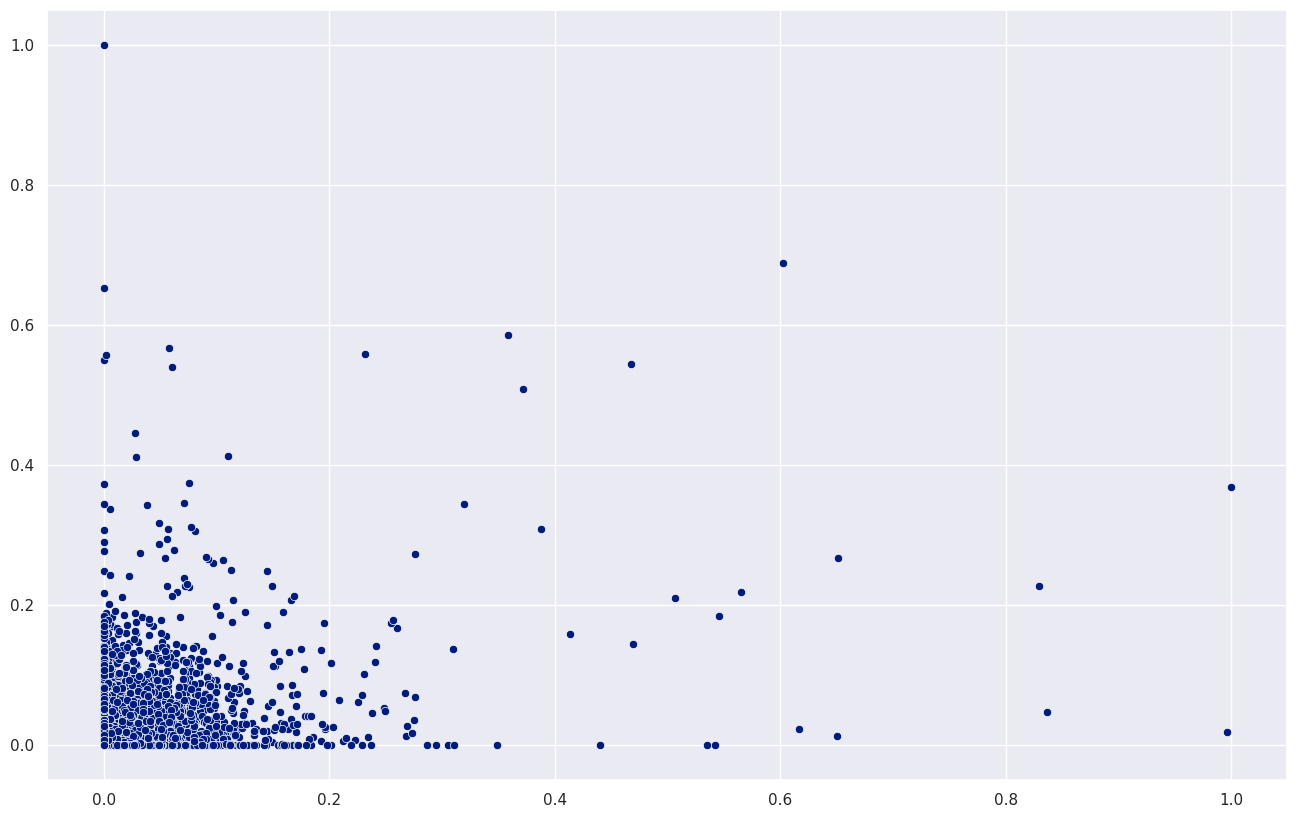

In [ ]:
sns.scatterplot(x=df_seg[:,0], y=df_seg[:,1])

In [ ]:
df_seg = df_cluster[["ONEOFF_PURCHASES" ,	"INSTALLMENTS_PURCHASES"]].values

In [ ]:
def plot_ssd_curve(data):

  ssd = {}
  for k in range(1, 10):
      kmeans = KMeans(init="k-means++", n_clusters=k, random_state=RANDOM_SEED).fit(data)
      ssd[k] = kmeans.inertia_
  plt.figure()
  plt.plot(list(ssd.keys()), list(ssd.values()),marker='o')
  plt.xlabel("Numero di cluster", fontsize=16)
  plt.ylabel("Somma delle distanza al quadrato", fontsize=16)
  plt.show()

valuto la performance del clustering attraverso  elbow method

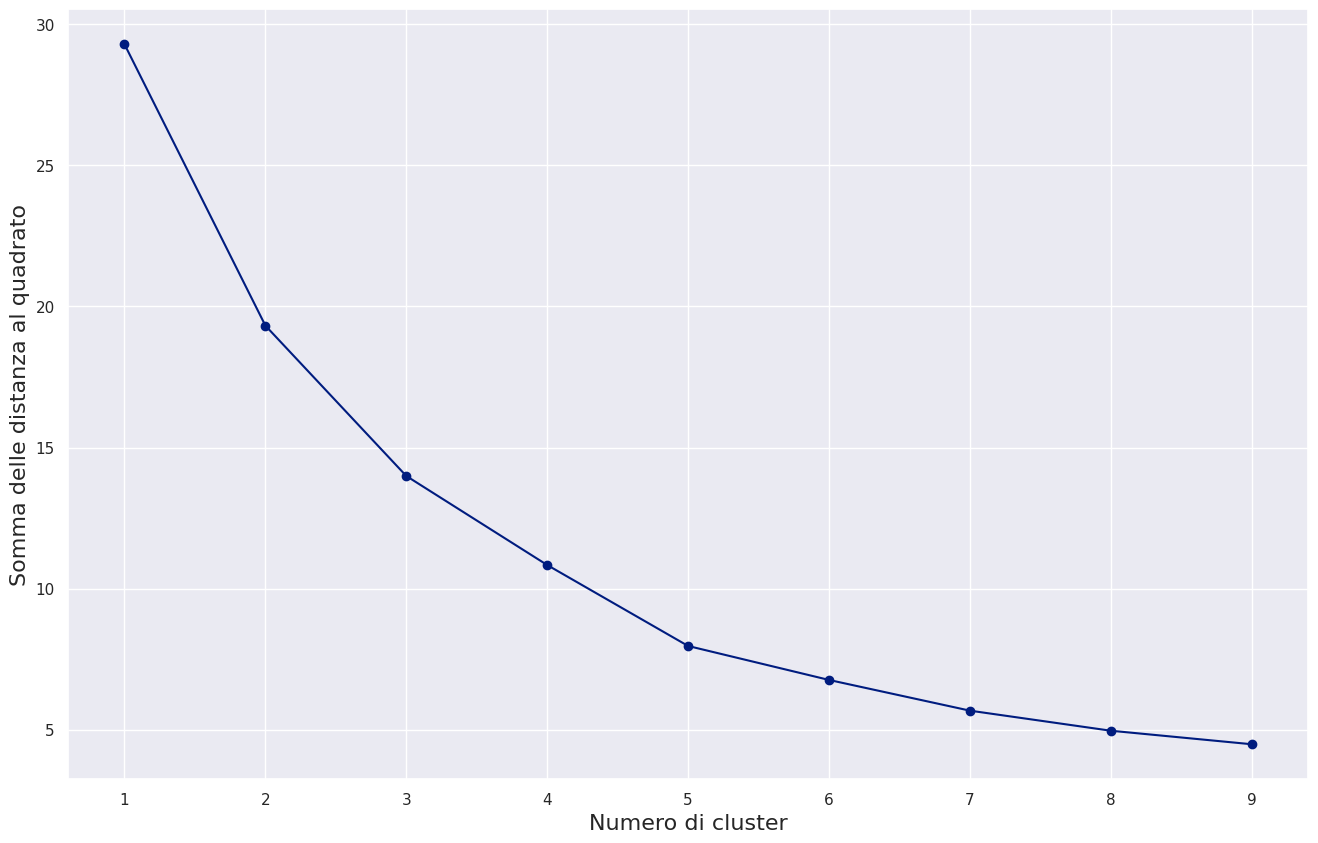

In [ ]:
plot_ssd_curve(df_seg)

la funziona sembra cominci a decrescere in maniera lineare dal 4' cluster in poi

In [ ]:
def plot_clusters(model, data, axlabels=None, print_ssd=False):
  y_pred = model.predict(data)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=y_pred, s=100)
  plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)

  plt.xlim(0, 0.6)
  plt.ylim(0, 0.6)

  if axlabels!=None:
    plt.xlabel(axlabels[0], fontsize=16)
    plt.ylabel(axlabels[1], fontsize=16)

  if print_ssd:
    plt.text(df_seg[:,0].max()-1, 0, f"SSD={model.inertia_:.2f}")

  plt.show()

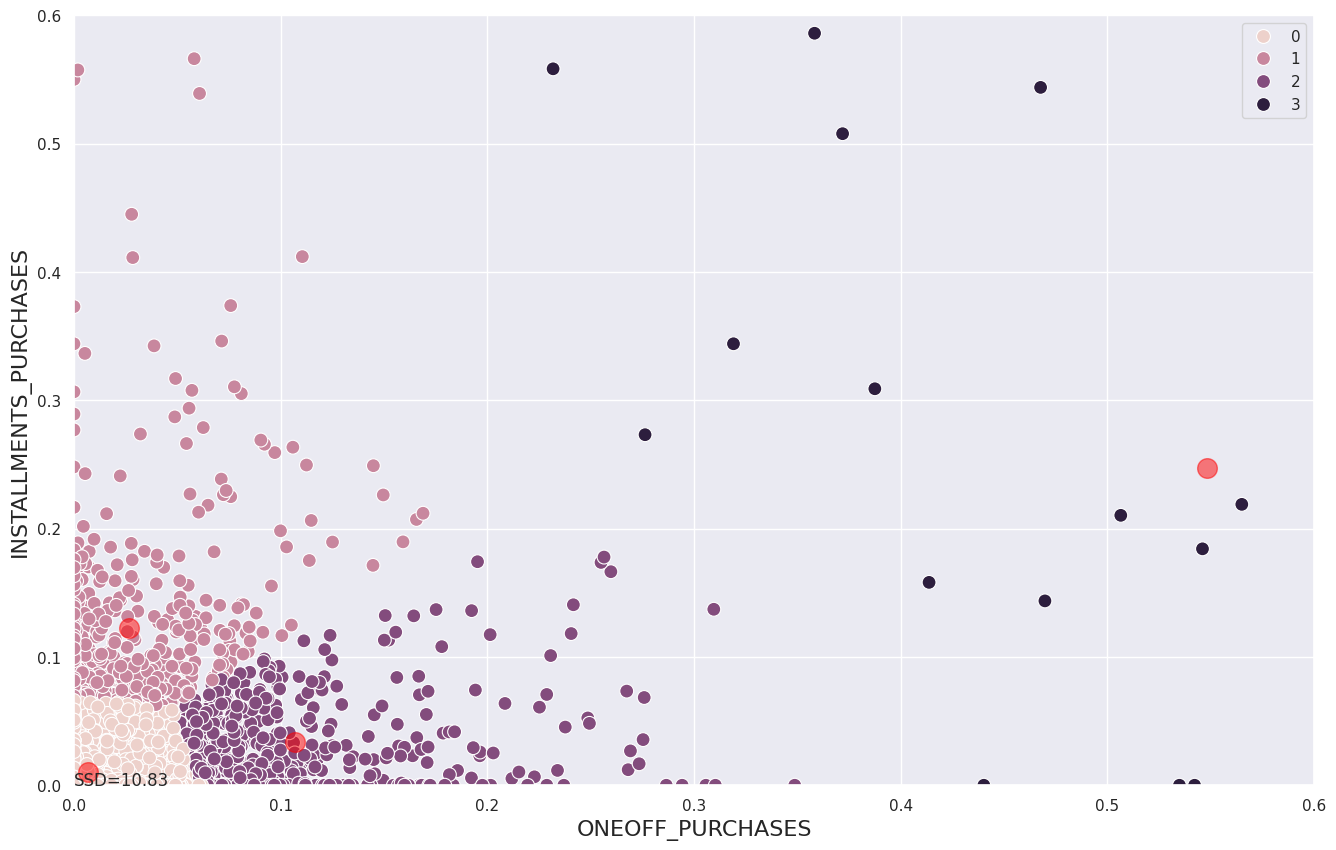

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = RANDOM_SEED)
kmeans.fit(df_seg)
plot_clusters(kmeans, df_seg, axlabels=["ONEOFF_PURCHASES" ,	"INSTALLMENTS_PURCHASES"], print_ssd=True)



Sulla base di questo scatterplot distinguo 4 categorie

In [ ]:
y_pred = kmeans.predict(df_seg)
y_pred



array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
df_result = pd.DataFrame({
    "CUST_ID":df["CUST_ID"],
    "Customer Group":y_pred,
    "BALANCE":df["BALANCE"],
    "BALANCE_FREQUENCY":df["BALANCE_FREQUENCY"],
    "PURCHASES":df["PURCHASES"],
    "ONEOFF_PURCHASES":df["ONEOFF_PURCHASES"],
    "INSTALLMENTS_PURCHASES":df["INSTALLMENTS_PURCHASES"],
    "CASH_ADVANCE":df["CASH_ADVANCE"],
    "PURCHASES_FREQUENCY":df["PURCHASES_FREQUENCY"],
    "ONEOFF_PURCHASES_FREQUENCY":df["ONEOFF_PURCHASES_FREQUENCY"],
    "PURCHASES_INSTALLMENTS_FREQUENCY":df["PURCHASES_INSTALLMENTS_FREQUENCY"],
    "CASH_ADVANCE_FREQUENCY":df["CASH_ADVANCE_FREQUENCY"],
    "CASH_ADVANCE_TRX":df["CASH_ADVANCE_TRX"],
    "PURCHASES_TRX":df["PURCHASES_TRX"],
    "PAYMENTS":df["PAYMENTS"],
    "MINIMUM_PAYMENTS":df["MINIMUM_PAYMENTS"],
    "PRC_FULL_PAYMENT":df["PRC_FULL_PAYMENT"],
    "CREDIT_LIMIT":df["CREDIT_LIMIT"],
    "TENURE":df["TENURE"]



})

df_result

,CUST_ID,Customer Group,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,CREDIT_LIMIT,TENURE
0,C10001,0,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0,2,201.80,139.510000,0.00,1000.0,12
1,C10002,0,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4,0,4103.03,1072.340000,0.22,7000.0,12
2,C10003,0,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0,12,622.07,622.070000,0.00,7500.0,12
3,C10004,0,1666.67,0.64,1499.00,1499.00,0.00,205.79,0.08,0.08,0.00,0.08,1,1,0.00,569.399458,0.00,7500.0,12
4,C10005,0,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0,1,678.33,244.790000,0.00,1200.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,0,28.49,1.00,291.12,0.00,291.12,0.00,1.00,0.00,0.83,0.00,0,6,325.59,48.890000,0.50,1000.0,6
8946,C19187,0,19.18,1.00,300.00,0.00,300.00,0.00,1.00,0.00,0.83,0.00,0,6,275.86,569.399458,0.00,1000.0,6
8947,C19188,0,23.40,0.83,144.40,0.00,144.40,0.00,0.83,0.00,0.67,0.00,0,5,81.27,81.270000,0.25,1000.0,6
8948,C19189,0,13.46,0.83,0.00,0.00,0.00,36.56,0.00,0.00,0.00,0.17,2,0,52.55,52.550000,0.25,500.0,6


In [ ]:
#raggruppo per Customer group
group_counts = df_result['Customer Group'].value_counts().sort_index()
group_counts

,count
Customer Group,
0,7957
1,516
2,454
3,23


In [ ]:
def mode_function(x):
    return x.mode().iloc[0]

Analisi e descrizione dei diversi cluster

Spese medie (bilancio, acquisti in unica soluzione, acquisti a rate). - Abitudini di pagamento (percentuale di pagamenti minimi, pagamenti completi). - Frequenza di utilizzo della carta (anticipi in contanti, frequenza degli acquisti).

In [ ]:
customer_summary = df_result.groupby('Customer Group').agg({
    'BALANCE': ['mean'],
    'INSTALLMENTS_PURCHASES': ['mean'],
    'ONEOFF_PURCHASES': ['mean'],#Spese medie (bilancio, acquisti in unica soluzione, acquisti a rate)
    'PRC_FULL_PAYMENT': [('mode', mode_function)],  # Calcolo della moda
    'CASH_ADVANCE_FREQUENCY': ['mean'],
    'PURCHASES_FREQUENCY':['mean'],#Frequenza di utilizzo della carta (anticipi in contanti, frequenza degli acquisti).
})


customer_summary['MINIMUM_PAYMENTS_PERC'] = (df_result.groupby('Customer Group')['MINIMUM_PAYMENTS'].sum() /
                                             df_result.groupby('Customer Group')['PAYMENTS'].sum()) * 100
#per il calcolo della percentuale dei pagamenti minimi ho fatto il rapporto tra minimi e payments *100
customer_summary

,BALANCE,INSTALLMENTS_PURCHASES,ONEOFF_PURCHASES,PRC_FULL_PAYMENT,CASH_ADVANCE_FREQUENCY,PURCHASES_FREQUENCY,MINIMUM_PAYMENTS_PERC
,mean,mean,mean,mode,mean,mean,
Customer Group,,,,,,,
0,1459.872696,223.600666,283.745674,0.0,0.142433,0.438557,37.711318
1,2228.296492,2766.446124,1077.327597,0.0,0.072578,0.935562,28.585685
2,2446.548524,758.694207,4349.118656,0.0,0.078744,0.868458,18.963194
3,5448.201304,5562.241304,22354.314348,1.0,0.039565,0.904783,12.051603


La divisione in 4 cluster è stabilita in base alle abitudini della clientela considerando gli importi spesi per acquisti a rate o in unica soluzione.
Il cluster 0 raggruppa chi fa meno acquisti, proporrei una campagna mirata ad un cashback su acquisti con carta in unica soluzione o interessi ad un tasso relativamente basso su acquisti effettuati a rate.
Il cluster 1 si indebita maggiormente, aspetto fondamentale per le finanziarie ma anche rischioso, quindi a questo gruppo di clientela proporrei tasso agevolato ma tenendo comunque sotto controllo i ritardi eventuali nei pagamenti.
Il cluster 2 raggruppa i clienti che acquistano maggiormente in unica soluzione proporrei una campagna mirata ad invogliarli agli acquisti a rate con anticipo e tasso zero in modo da garantirgli una via di mezzo tra le abitudini e il passo verso l'acquisto a rate.
Il cluster 3 evidenzia una maggiore densità tra i clienti che mantengono un equilibro tra acquisti a rate che in un contanti e potrebbero andare bene tutte e tre le campagne sopracitate.